In [1]:
import pandas as pd
import sklearn

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.drop(columns=['PassengerId'],axis=1,inplace=True)

In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [8]:
mean_=df['Age'].mean()

In [9]:
mean_

29.69911764705882

In [10]:
df['Age'].fillna(mean_,inplace=True)

C:\Users\ALVI COMPUTER\AppData\Local\Temp\ipykernel_12784\2658965324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_,inplace=True)


In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [12]:
df['Sex']=df['Sex'].map({'male':1,
             'female':0})

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [14]:
df.drop(columns=['Name'],axis=1,inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,0,35.0,1,0,113803,53.1000,S
4,0,3,1,35.0,0,0,373450,8.0500,S


In [16]:
df['Embarked']=df['Embarked'].map({'S':1,
                                  'C':0})

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,A/5 21171,7.2500,1.0
1,1,1,0,38.0,1,0,PC 17599,71.2833,0.0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1.0
3,1,1,0,35.0,1,0,113803,53.1000,1.0
4,0,3,1,35.0,0,0,373450,8.0500,1.0


In [18]:
df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
survive=df['Survived']
survive

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [21]:
df.drop(columns=['Survived'],axis=1,inplace=True)

In [22]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,A/5 21171,7.2500,1.0
1,1,0,38.0,1,0,PC 17599,71.2833,0.0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1.0
3,1,0,35.0,1,0,113803,53.1000,1.0
4,3,1,35.0,0,0,373450,8.0500,1.0


In [23]:
df.drop(columns=['Ticket'],axis=1,inplace=True)

In [24]:
df.isna().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked    79
dtype: int64

In [25]:
import numpy as np
df.Embarked=df.Embarked.replace(np.nan,1)

In [26]:
df.Embarked.unique()

array([1., 0.])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df, survive, test_size=0.2, random_state=42)

In [28]:
model=LogisticRegression(max_iter=100)
model.fit(X_train,y_train)

C:\Users\ALVI COMPUTER\.conda\envs\traning_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
pre=model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pre)

0.8044692737430168

In [31]:
from sklearn.svm import SVC

In [32]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

In [33]:
svm_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [34]:
pre_svm=svm_model.predict(X_test)

In [35]:
accuracy_score(y_test,pre_svm)

0.7821229050279329

In [36]:
svm_model1 = SVC(kernel='linear', C=3.0, random_state=42)
svm_model1.fit(X_train,y_train)
pre_svm1=svm_model.predict(X_test)
accuracy_score(y_test,pre_svm1)

0.7821229050279329

In [37]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [38]:
pre_xg=xgb_model.predict(X_test)
accuracy_score(y_test,pre_xg)

0.776536312849162

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
pred_gnb = gnb_model.predict(X_test)

In [40]:
accuracy_score(y_test,pred_gnb)

0.776536312849162

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(max_depth=7, random_state=42)
clf.fit(X_train,y_train)
accu_clf=clf.predict(X_test)
accuracy_score(y_test,accu_clf)

0.8212290502793296

In [43]:
from sklearn.tree import DecisionTreeClassifier
dec_clf=DecisionTreeClassifier()
dec_clf.fit(X_train,y_train)
accuracy_score(y_test,dec_clf.predict(X_test))

0.7653631284916201

In [44]:
from sklearn.ensemble import VotingClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

In [45]:
svm = SVC(probability=True, random_state=42)
voting_classifier = VotingClassifier(estimators=[
    ('rf', random_forest),
    ('lr', logistic_regression),
    ('svc',svm)
], voting='hard')

In [46]:
voting_classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

In [47]:
accuracy_score(y_test,voting_classifier.predict(X_test))

0.7932960893854749

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

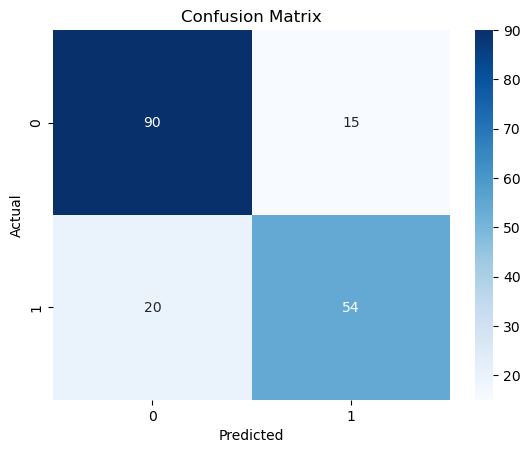

In [49]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pre)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()